# "50 startups."

### _"Predict which companies to invest for maximizing profit" (Regression task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains data about 50 startups. It has 7 columns: “ID”, “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Category”  “Profit”.

    
**Метаданные:**
    
* **ID** - startup ID

* **R&D Spend** - how much each startup spends on Research and Development

* **Administration** - how much they spend on Administration cost

* **Marketing Spend** - how much they spend on Marketing

* **State** - which state the startup is based in

* **Category** - which business category the startup belong to

* **Profit** - the profit made by the startup
   

### Questions:
    

* #### Predict which companies to invest for maximizing profit (choose model with the best score; create predictions; choose companies)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head
* ### Observation of target variable (describe + visualisation:distplot)
* ### Numerical and Categorical features
    * #### List of Numerical and Categorical features
* ### Missing Data
    * #### List of data features with missing values  
    * #### Filling missing values
* ### Numerical and Categorical features    
    * #### Visualisation  of Numerical and categorical features (regplot + barplot)

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### One-Hot Encoding 
* ### Standard Scaler (optional)
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### ML Models (Linear regression, Gradient Boosting Regression)
* ### Build, train, evaluate and visualise models
* ### Creating final predictions with Test set
* ### Model comparison


## [Conclusion](#Conclusion.)
* ### Submission of ‘.csv’ file with predictions

## Part 1: Import, Load Data.

* ### Import 

In [89]:
# import standard libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from scipy import stats                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

# import models and metrics
from sklearn import metrics, linear_model, model_selection
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

* ### Load Data

In [90]:
# read data from '.csv' files
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")

# identify target
target = train['Profit']

## Part 2: Exploratory Data Analysis.

* ### Info

In [91]:
# print the full summary of the Train dataset
train.info()

<class 'pandas.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   50 non-null     float64
 3   Marketing Spend  47 non-null     float64
 4   State            50 non-null     str    
 5   Category         49 non-null     str    
 6   Profit           50 non-null     float64
dtypes: float64(4), int64(1), str(2)
memory usage: 2.9 KB


In [92]:
# print the full summary of the Test dataset
test.info()

<class 'pandas.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   48 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            49 non-null     str    
 5   Category         50 non-null     str    
dtypes: float64(3), int64(1), str(2)
memory usage: 2.5 KB


* ### Head

In [170]:
# preview of the first 5 lines of the loaded Train data 
train.head(50)

,R&D Spend,Administration,Marketing Spend,State,Category,Profit
ID,,,,,,
0,165349.200000,136897.80,471784.100000,New York,Industrials,192261.83
1,162597.700000,151377.59,443898.530000,California,Technology,191792.06
2,153441.510000,101145.55,407934.540000,Florida,Healthcare,191050.39
3,144372.410000,118671.85,383199.620000,New York,Financials,182901.99
4,142107.340000,91391.77,366168.420000,Florida,Industrials,166187.94
5,131876.900000,99814.71,362861.360000,New York,Telecommunications,156991.12
6,134615.460000,147198.87,127716.820000,California,Telecommunications,156122.51
7,130298.130000,145530.06,323876.680000,Florida,Technology,155752.60
8,120542.520000,148718.95,311613.290000,New York,Healthcare,152211.77


In [136]:
# preview of the first 5 lines of the loaded Test data 
test.head(
)

,R&D Spend,Administration,Marketing Spend,State,Category
ID,,,,,
0,165349.20,136897.80,471784.10,New York,Industrials
1,162597.70,151377.59,443898.53,California,Technology
2,153441.51,101145.55,407934.54,Florida,Healthcare
3,144372.41,118671.85,383199.62,New York,Financials
4,142107.34,91391.77,366168.42,Florida,Industrials


* ### Observation of target variable

In [95]:
# target variable
train['Profit'].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

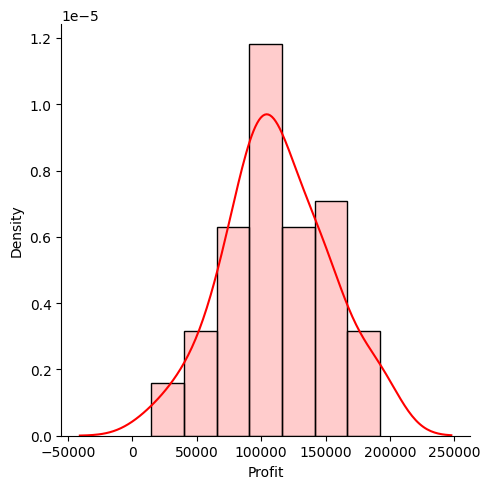

In [139]:
# visualisation of 'Profit' distribution
sns.displot(train['Profit'], color = 'r', kde = True, kde_kws = dict(cut = 3), alpha = 0.2, stat= "density")

In [97]:
# set 'ID' to index
train = train.set_index('ID')
test  = test.set_index('ID')

* ### Numerical and Categorical features
#### List of Numerical and Categorical features

In [143]:
# check for Numerical and Categorical features in Train
numerical_feats_train = train.dtypes[train.dtypes != 'str'].index
print ('Quantity of Numerical features: ', len(numerical_feats_train))
print ()
print (train[numerical_feats_train].columns)
print ()
categorical_feats_train = train.dtypes[train.dtypes == 'str'].index
print ('Quantity of Categorical features: ', len(categorical_feats_train))


Quantity of Numerical features:  4

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='str')

Quantity of Categorical features:  2


* ### Missing values

#### List of data features with missing values

In [147]:
# check the Train features with missing values 
nan_columns = [i for i in train.columns if train[i].isnull().any()]
print(train.isnull().sum())
print()
print('There are ' + str(len(nan_columns)) + ' columns with NAN values for 50 rows.')
nan_columns

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Category           1
Profit             0
dtype: int64

There are 3 columns with NAN values for 50 rows.


['R&D Spend', 'Marketing Spend', 'Category']

In [149]:
# check the Test features with missing values
nan_columns = [i for i in test.columns if test[i].isnull().any()]
print(test.isnull().sum())
print()
print('There are ' +str(len(nan_columns)) + ' columns with NAN values for 50 rows.')
nan_columns

R&D Spend          2
Administration     2
Marketing Spend    0
State              1
Category           0
dtype: int64

There are 3 columns with NAN values for 50 rows.


['R&D Spend', 'Administration', 'State']

#### Filling missing values

Fields where NAN values have meaning.

Explaining in further depth:

* 'R&D Spend': Numerical - replacement of NAN by 'mean';
* 'Administration': Numerical - replacement of NAN by 'mean';
* 'Marketing Spend': Numerical - replacement of NAN by 'mean';
* 'State': Categorical - replacement of NAN by 'None';
* 'Category': Categorical - replacement of NAN by 'None'.

In [171]:
 # Numerical NAN columns to fill in Train and Test datasets
nan_columns_fill = [
    'R&D Spend',
    'Administration',
    'Marketing Spend',
]

# replace 'NAN' with 'mean' in these columns
for col in nan_columns_fill:
    train[col] = train[col].fillna(train[col].mean())
    test[col]  = test[col].fillna(test[col].mean())

# Categorical NAN columns to fill in Train and Test datasets
na_columns_fill = [
    'State',
    'Category'
]

# replace 'NAN' with 'None' in these columns
for col in na_columns_fill:
    train[col] = train[col].fillna('None')
    test[col]  = test[col].fillna('None')

In [174]:
# check is there any mising values left in Train
int(train.isnull().sum().sum())

0

In [175]:
# check is there any mising values left in Test
int(test.isnull().sum().sum())

0

#### Visualisation  of Numerical features (regplot)

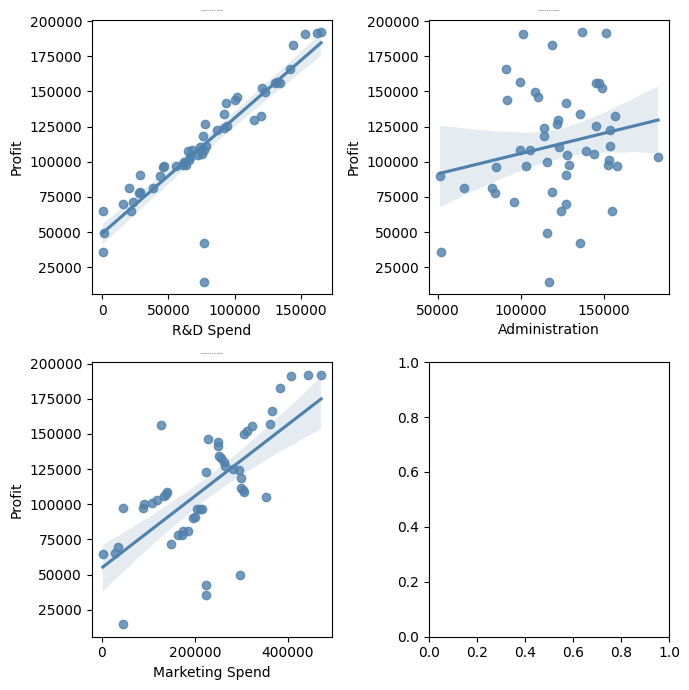

In [182]:
# numerical features visualisation
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize = (nr_cols*3.5, nr_rows*3.5))

num_feats = list(numerical_feats_train)
not_plot = ['Id' , 'Profit']
plot_num_feats = [c for c in list(numerical_feats_train) if c not in not_plot]

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i = r*nr_cols + c
        if i  < len(plot_num_feats):
            sns.regplot(x = train[plot_num_feats[i]], y = train['Profit'], ax = axs[r][c], color = "#5081ac")
            stp = stats.pearsonr(train[plot_num_feats[i]],train['Profit'])

            str_title = "r = " + "{0: .2f}".format(stp[0]) + "     " "p = " + "{0: .2f}".format(stp[1])
            axs[r][c].set_title(str.title, fontsize = 1)


plt.tight_layout()
plt.show()

<Axes: xlabel='State', ylabel='Profit'>

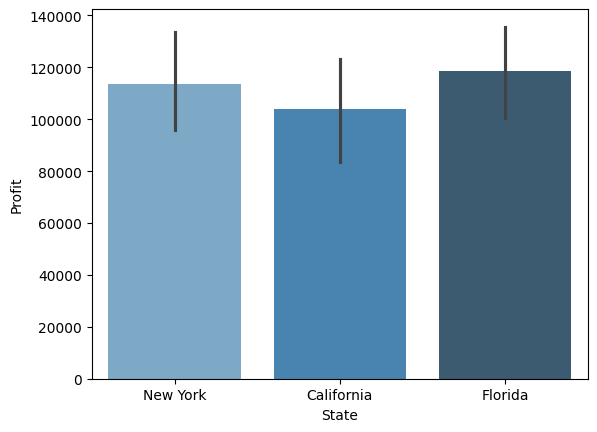

In [185]:
# categorical features visualisation
# 'Profit' split in 'State' level
sns.barplot(x ='State', y ='Profit', hue ='State', data = train, palette = 'Blues_d', legend = False)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Industrials'),
  Text(1, 0, 'Technology'),
  Text(2, 0, 'Healthcare'),
  Text(3, 0, 'Financials'),
  Text(4, 0, 'Telecommunications'),
  Text(5, 0, 'None'),
  Text(6, 0, 'Oil & Gas')])

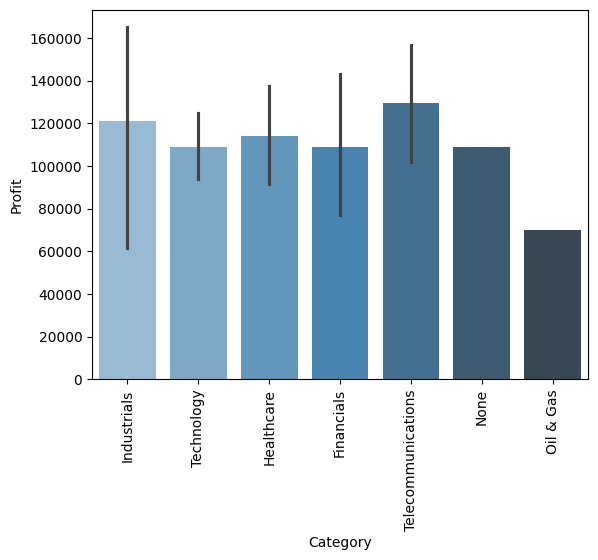

In [194]:
# categorical features visualisation
# 'Profit' split in 'Category' level
sns.barplot(x ='Category', y ='Profit', hue = 'Category', data = train, palette = 'Blues_d', legend = False)
plt.xticks(rotation = 90)

## Part 3: Data Wrangling and Transformation.

* ### One-Hot Encoding

In [107]:
# One-Hot Encoding Train dataset


# Drop target variable 



In [108]:
# preview of the first 5 lines of the loaded Train data 


In [109]:
# Train data shape


In [110]:
# One Hot-Encoding Test dataset


In [111]:
# preview of the first 5 lines of the loaded Test data 


In [112]:
# Test data shape


In [113]:
# Drop unnecessary variables 


* ### StandardScaler

* ### Creating datasets for ML part

In [114]:
# set 'X' for features of scaled Train dataset 'sc_train'


# set 'y' for the target 'Profit'


# 'X_Test' for features of scaled Test dataset 'sc_test'


* ### 'Train\Test' split

## Part 4: Machine Learning.

* ### Build, train, evaluate and visualise models

* #### Linear Regression

In [115]:
# Linear Regression model


# Model Training

# Model Prediction


In [116]:
# Model R2 score


In [117]:
# Model Metrics


In [118]:
# visualisation of Train dataset predictions

# Plot outputs


In [119]:
# Test final predictions


In [120]:
# Model Metrics


In [121]:
# visualisation of Test dataset predictions

# Plot outputs


In [122]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset


* #### Gradient Boosting Regressor

In [123]:
# Gradient Boosting Regressor model


# Model Training


# Model Prediction


# Model R2 score


In [124]:
# Model Metrics


In [125]:
# Test final predictions


In [126]:
# Model Metrics


In [127]:
# visualisation of Test dataset predictions

# Plot outputs


### Model comparison

In [128]:
# score comparison of models


In [129]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset


**Result**: The best model is **Gradient Boosting Regressor** with **R2 score = 0.972002**.

##  Conclusion.

In [130]:
# submission of .csv file with final predictions
